In [16]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xml.etree.ElementTree as ET

In [2]:
img_dir = "C:/Github/Img_Classifier/images/Images"
ant_dir = "C:/Github/Img_Classifier/annotations/Annotation"
X = [] #input array
Y = [] #output array

bnd_dict = {}

label_count = 0
for sub_dir in os.listdir(ant_dir):
    label_count += 1
    label = sub_dir.split("-")[1]
    print(label)
    path=os.path.join(ant_dir,sub_dir)
    for ant in os.listdir(path):
        if ant[0] != 'n': continue
        tree = ET.parse(os.path.join(path,ant))
        root = tree.getroot()
        bndbox = root.find("object").find("bndbox")
        xmin = int(bndbox.findtext("xmin"))
        ymin = int(bndbox.findtext("ymin"))
        xmax = int(bndbox.findtext("xmax"))
        ymax = int(bndbox.findtext("ymax"))
        bnd_dict[ant] = [xmin, ymin, xmax, ymax]
    if label_count >= 20: break
#print(bnd_dict)

Chihuahua
Japanese_spaniel
Maltese_dog
Pekinese
Shih
Blenheim_spaniel
papillon
toy_terrier
Rhodesian_ridgeback
Afghan_hound
basset
beagle
bloodhound
bluetick
black
Walker_hound
English_foxhound
redbone
borzoi
Irish_wolfhound


In [3]:
label_count = 0
for sub_dir in os.listdir(img_dir):
    label_count += 1
    label = sub_dir.split("-")[1]
    print(label)
    path=os.path.join(img_dir,sub_dir)
    for img in os.listdir(path):
        #print(img)
        if img[0] != 'n': continue
        img_array=imread(os.path.join(path,img))
        #imshow(img_array)
        #plt.show()
        bnd = bnd_dict[img.split(".")[0]]
        img_bnd = img_array[bnd[1]:bnd[3],bnd[0]:bnd[2]]
        #imshow(img_bnd)
        #plt.show()
        
        img_resized=resize(img_bnd,(150,150,3))
        
        X.append(img_resized.flatten())
        Y.append(label_count-1)
    print(f'loaded category:{label} successfully')
    if label_count >= 20: break

X=np.array(X)
Y=np.array(Y)
print(X)
print(Y)

Chihuahua
loaded category:Chihuahua successfully
Japanese_spaniel
loaded category:Japanese_spaniel successfully
Maltese_dog
loaded category:Maltese_dog successfully
Pekinese
loaded category:Pekinese successfully
Shih
loaded category:Shih successfully
Blenheim_spaniel
loaded category:Blenheim_spaniel successfully
papillon
loaded category:papillon successfully
toy_terrier
loaded category:toy_terrier successfully
Rhodesian_ridgeback
loaded category:Rhodesian_ridgeback successfully
Afghan_hound
loaded category:Afghan_hound successfully
basset
loaded category:basset successfully
beagle
loaded category:beagle successfully
bloodhound
loaded category:bloodhound successfully
bluetick
loaded category:bluetick successfully
black
loaded category:black successfully
Walker_hound
loaded category:Walker_hound successfully
English_foxhound
loaded category:English_foxhound successfully
redbone
loaded category:redbone successfully
borzoi
loaded category:borzoi successfully
Irish_wolfhound
loaded category

In [4]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [5]:
print(scaler.transform(X))

[[-0.68289881 -0.86076943 -0.67577965 ... -1.94180837 -1.87301137
  -1.52855905]
 [ 1.55679449 -0.93230111 -0.03687528 ...  0.20312716  0.74613667
   0.07820526]
 [ 0.50469644  0.51364074  0.73521865 ...  0.86868283  1.03325498
   0.63662159]
 ...
 [-1.49344051 -1.43345084 -0.98943747 ... -0.47910372 -0.71746923
  -0.79850705]
 [ 0.20029795  0.46879415  0.93590712 ... -0.06183596  0.53568931
   1.42315968]
 [ 2.1856696   2.24646053  2.42386136 ...  0.1838448   0.20085533
   0.46641345]]


# Training

It was observed that we rbf kernel, all the samples were predicted the class with maximum samples in the training set. 

While in case of polynomial kernel, we observed high training accuracy. However, the model did not tend to point 
towards a single prediction.

Training time: 1 hr 04 minutes. 

In [6]:
param_grid={'C':[0.1],'gamma':[0.1],'kernel':['poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=77,stratify=Y)
print('Splitted Successfully')

Splitted Successfully


In [8]:
y_train

array([ 3, 18,  8, ..., 11,  4, 14])

In [9]:
model.fit(x_train,y_train)
print('The Model is trained well with the given images')

The Model is trained well with the given images


In [10]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(x_train,y_train)
pred_dum= dummy_classifier.predict(x_test)
accuracy_score(y_test, pred_dum)

0.07015130674002751

# Testing

In [11]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[ 2  4  4 14  9  6  3 15  9 11 19  0  6  1  2 11  5 17 17  4  5  0  6  2
  0 11 17 19  2 11  1  9 14 10  8 11 17  1  2  8 19  8 17  0 11 11  4 19
 18  7 19 14  6  4 16  2 15 15  8  6  2 19 19 17  4  3 19 19  6 10 10  4
  1  6  1 12  0  4 11 19 19  3 19 11 16  6 14  1 19  0  4  2  8  6 17  8
  8 17 16 16  1  0  6  9  4 12  1  2  3  9  9  2  6 19  8 15  3  0 15 16
 17  6  2 16  9  2  6 19 19  1  2  1 17  5  4 16  4  3  7 17 11  9  6  8
  4  7  3  2  8 18  9  8  8 19 14  2  3 13  6  1  7  0 19  3  5 15  9 17
 12 17  8  3  7  1 19 10  7 14 10 19  3  8  5 12  9  1  9 12 12 11 18 11
  8 11  2  4 16 14  7  1  4 14 12 17 18  1 19  2  7  1 11 11 14 11  6 16
 16  1 18  9  9  1  2  2  2  2 11  2  2  2  4  9  0  8 17  1  2  8  8 17
  8 16  1 13  7  4  6  1  3  1  9 11  8  5 19 12 11 17 19  1  8  4 11  5
  8 11  5  2  9 14  2  7  7  2  6 11  4 13  4 19 19  0  8  2 19 11  6  8
  5  4 17 14  2  2  1  6  2  0 16  3 11  9  5  5  6 16  2 19 17 12  2  2
  3  9 10  4 18  1  2 18  8

# Performance Metrics

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.10      0.13        30
           1       0.20      0.27      0.23        37
           2       0.27      0.45      0.34        51
           3       0.11      0.13      0.12        30
           4       0.10      0.14      0.12        43
           5       0.30      0.24      0.26        38
           6       0.19      0.26      0.22        39
           7       0.15      0.12      0.13        34
           8       0.22      0.29      0.25        34
           9       0.31      0.27      0.29        48
          10       0.21      0.09      0.12        35
          11       0.12      0.15      0.14        39
          12       0.16      0.11      0.13        37
          13       0.27      0.12      0.16        34
          14       0.47      0.47      0.47        32
          15       0.13      0.06      0.09        31
          16       0.24      0.26      0.25        31
          17       0.17    

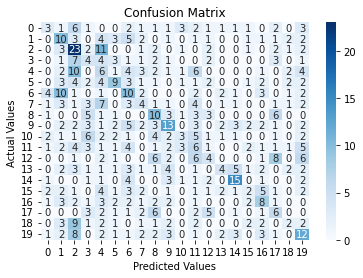

In [17]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()